## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

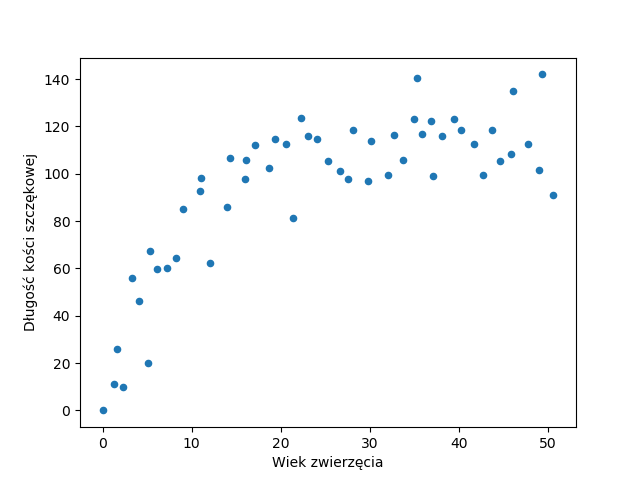

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [550]:
import numpy as np

'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(X: np.ndarray, n: int) -> np.ndarray:
    out = []
    # YOUR CODE HEREfor x in abc:
    for x in X:
        z = []
        for y in x:
            a = []
            for i in range(1,n + 1):
                a.append(y**i)
            z = z + a
        out.append(z)
    return out

### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#YOUR CODE HERE

df = pd.read_csv('../datasets/jaws.csv', sep=',')

In [552]:
df['age'].head(5)

0     0.000000
1     5.112000
2     1.320000
3    35.240000
4     1.632931
Name: age, dtype: float64

In [553]:
# YOUR CODE HERE
import random
from typing import Tuple, List
import sklearn.preprocessing as skl
import sklearn.metrics as metric

def initialize_coefficients(n: int = 2, alpha = None) -> Tuple[float, np.ndarray]:
    #YOUR CODE HERE
    return (random.random() if alpha == None else alpha,np.array([random.random() for x in range(n + 1)]))

def calculate_regression_function(X: np.ndarray, betas: np.ndarray, normalize: bool = False) -> np.ndarray:
    #YOUR CODE HERE
    # result = []
    # for x in X:
    #     suma = betas[0]
    #     for i in range(len(x)):
    #         suma += x[i] * betas[1:][i]
    #     result.append(suma)
    # return np.array(result)
    if normalize:
        X = skl.StandardScaler().fit_transform(X)
    return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])

def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    #YOUR CODE HERE
    # results = calculate_regression_function(X,betas)
    # suma = 0
    # for i in range(len(results)):
    #     suma += np.power((results[i] - y[i]),2)
    # return suma/(len(y)*2)
    return np.sum((calculate_regression_function(X,betas) - y)**2)/len(y)

def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    #YOUR CODE HERE
    # results = calculate_regression_function(X,betas)
    # gradient = []
    # ### Obliczenie pierwszej bety
    # suma = 0
    # for i in range(len(results)):
    #     suma += (results[i] - y[i])
    # gradient.append(suma/len(y))
    # ### Obliczenie reszty bety
    # for j in range(1,len(betas)):
    #     sum = 0
    #     for i in range(len(results)):
    #         sum += (results[i] - y[i])*X[i][j-1]
    #     gradient.append(sum/len(y))
    # return np.array(gradient)
    results = calculate_regression_function(X,betas)
    return np.append(np.array(np.sum(results - y)/len(y)),np.array([np.sum([(results[i] - y[i])*X[i][j-1] for i in range(len(results))])/len(y) for j in range(1,len(betas))]))

def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    #YOUR CODE HERE
    # result = calculate_gradient(X,y,betas)
    # new_betas = []
    # for i in range(len(betas)):
    #     new_betas.append(betas[i] - result[i]*alpha)
    # return np.array(new_betas)
    return np.array(betas-calculate_gradient(X,y,betas)*alpha)

In [554]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(X: np.ndarray, y: np.ndarray, epochs: int = 1000, alpha: float = 0.00005, polynomial_features: int = 0, normalize: str = False) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    #YOUR CODE HERE
    X = [[age] for age in X]
    if polynomial_features != 0:
        X = transform_to_polynomial_feature(X,polynomial_features)
    if normalize:
        X = skl.StandardScaler().fit_transform(X)
    betas = [[]]
    _, betas[0] = initialize_coefficients(len(X[0]), alpha=0.00005)
    error = []
    for i in range (epochs):
        error.append(calculate_error(X,y,np.array(betas[-1])))
        betas.append(update_regression_coefficients(X,y,np.array(betas[-1]),alpha))
    return ([beta[0] for beta in betas], [beta[1:] for beta in betas], error)


In [555]:
epochs=1000
alpha = 0.01
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=2, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(df['age'])],2)
calculate_regression_function(X,np.append([beta0[-1]],betas[-1]), normalize=True)


array([ 51.29424779,  61.93707261,  54.1050026 , 111.38167785,
        54.76495407,  56.15864352,  58.28505279,  59.76717269,
        62.24758345,  63.86891731,  66.16750209,  68.22586921,
        69.67245414,  73.16263301,  73.56996358,  75.41509435,
        78.88160716,  79.44201535,  82.34655616,  82.55878177,
        84.26708807,  86.92994304,  88.10184472,  90.10362325,
        91.37401793,  92.87054527,  94.07776825,  95.77413725,
        97.60105661,  99.54351308, 100.95449219, 101.76082431,
       104.06533572, 104.58502807, 107.13562777, 108.0993267 ,
       109.43963955, 111.06868075, 112.18837891, 113.35971392,
       113.71181482, 114.95906589, 116.47072655, 117.40404963,
       119.02026678, 120.06248293, 121.25054143, 122.1360294 ,
       123.39331438, 123.55280779, 125.19329666, 126.37759252,
       126.71227646, 127.85414899])

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:31: RuntimeWarning: overflow encountered in square
  return np.sum((calculate_regression_function(X,betas) - y)**2)/len(y)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:50: RuntimeWarning: overflow encountered in scalar multiply
  return np.append(np.array(np.sum(results - y)/len(y)),np.array([np.sum([(results[i] - y[i])*X[i][j-1] for i in range(len(results))])/len(y) for j in range(1,len(betas))]))
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:22: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:22: RuntimeWarning: 

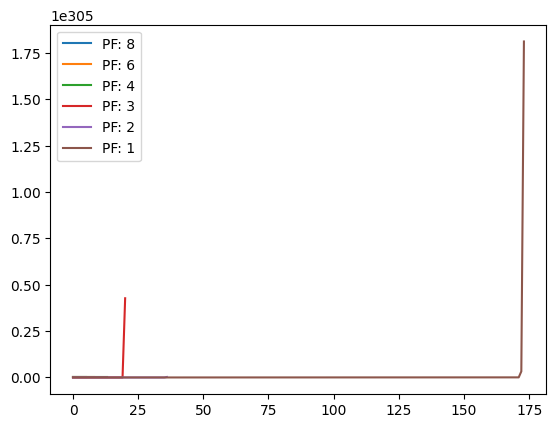

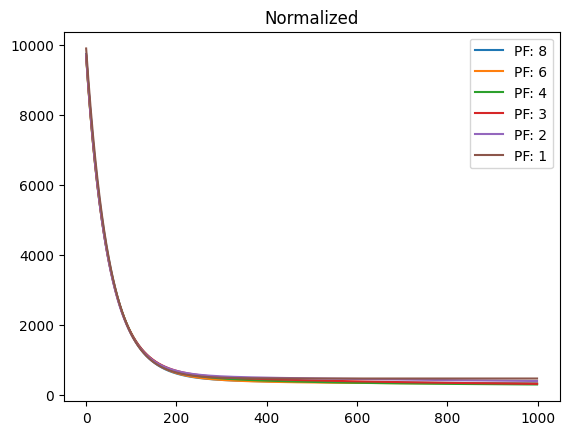

In [556]:
epochs=1000
alpha = 0.01
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=8)
plt.plot(range(epochs),error,label='PF: 8')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=6)
plt.plot(range(epochs),error,label='PF: 6')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=4)
plt.plot(range(epochs),error,label='PF: 4')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=3)
plt.plot(range(epochs),error,label='PF: 3')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=2)
plt.plot(range(epochs),error,label='PF: 2')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=1)
plt.plot(range(epochs),error,label='PF: 1')

plt.legend()
plt.show()

beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=8, normalize=True)
plt.plot(range(epochs),error,label='PF: 8')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=6, normalize=True)
plt.plot(range(epochs),error,label='PF: 6')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=4, normalize=True)
plt.plot(range(epochs),error,label='PF: 4')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=3, normalize=True)
plt.plot(range(epochs),error,label='PF: 3')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=2, normalize=True)
plt.plot(range(epochs),error,label='PF: 2')
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=alpha, polynomial_features=1, normalize=True)
plt.plot(range(epochs),error,label='PF: 1')

plt.title('Normalized')
plt.legend()
plt.show()

### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [557]:
# # YOUR CODE HERE
import time
from sklearn.linear_model import LinearRegression

epochs=1000
# YOUR CODE HERE
begin_time = time.time()
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=5, normalize=True)
end_time = time.time()

print(f'Mój algorytm z normalizacją: {end_time - begin_time}')

begin_time = time.time()
beta0, betas, error = learn_and_fit(np.array(df['age']),np.array(df['bone']),epochs=epochs, alpha=0.00001, polynomial_features=5)
end_time = time.time()

print(f'Mój algorytm bez normalizacji: {end_time - begin_time}')



Mój algorytm z normalizacją: 0.8750665187835693


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:31: RuntimeWarning: overflow encountered in square
  return np.sum((calculate_regression_function(X,betas) - y)**2)/len(y)
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:50: RuntimeWarning: overflow encountered in scalar multiply
  return np.append(np.array(np.sum(results - y)/len(y)),np.array([np.sum([(results[i] - y[i])*X[i][j-1] for i in range(len(results))])/len(y) for j in range(1,len(betas))]))
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_8400\1120926282.py:22: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([betas[0] + np.sum([a * beta for a,beta in zip(x,betas[1:])]) for x in X])


Mój algorytm bez normalizacji: 0.7386598587036133


### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

Dla stopnia wielomianu 1 wynik R2 wynosi 0.561853131359612
Dla stopnia wielomianu 2 wynik R2 wynosi 0.8011994000118592
Dla stopnia wielomianu 3 wynik R2 wynosi 0.7798428354203081
Dla stopnia wielomianu 4 wynik R2 wynosi 0.7850514038286669
Dla stopnia wielomianu 5 wynik R2 wynosi 0.7983169734359419


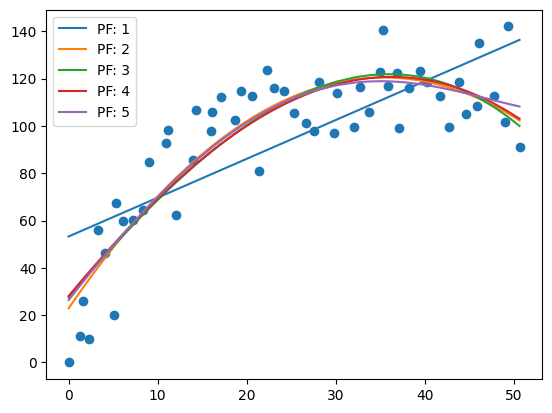

In [564]:
# YOUR CODE HERE

df_sorted = df.sort_values(by='age')
sorted_age = df_sorted['age']
sorted_bone = df_sorted['bone']

# Tworzenie wykresu
plt.scatter(sorted_age, sorted_bone)

epochs=1000
alpha = 0.1

poly = 1
beta0, betas, error = learn_and_fit(np.array(sorted_age), np.array(sorted_bone), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_age)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_age, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_bone),results)}')

poly = 2
beta0, betas, error = learn_and_fit(np.array(sorted_age), np.array(sorted_bone), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_age)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_age, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_bone),results)}')

poly = 3
beta0, betas, error = learn_and_fit(np.array(sorted_age), np.array(sorted_bone), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_age)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_age, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_bone),results)}')

poly = 4
beta0, betas, error = learn_and_fit(np.array(sorted_age), np.array(sorted_bone), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_age)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_age, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_bone),results)}')

poly = 5
beta0, betas, error = learn_and_fit(np.array(sorted_age), np.array(sorted_bone), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_age)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_age, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_bone),results)}')

plt.legend()
plt.show()


### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

In [559]:
# YOUR CODE HERE
df2 = pd.read_csv('../datasets/Real estate.csv', sep=',')


In [560]:
df2.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


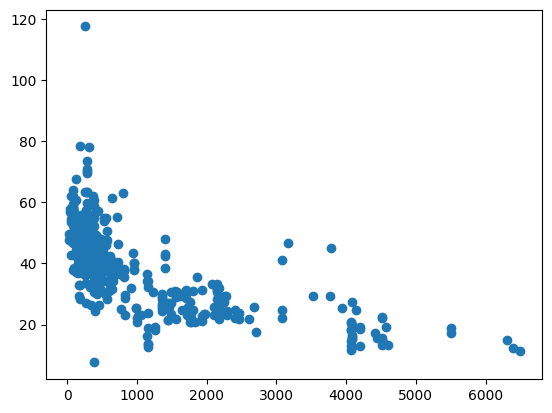

In [561]:
plt.scatter(df2['X3 distance to the nearest MRT station'], df2['Y house price of unit area'])

Dla stopnia wielomianu 1 wynik R2 wynosi 0.45375427891826714
Dla stopnia wielomianu 2 wynik R2 wynosi 0.5269736673908056
Dla stopnia wielomianu 3 wynik R2 wynosi 0.5291036676620084
Dla stopnia wielomianu 4 wynik R2 wynosi 0.5427669625053058
Dla stopnia wielomianu 5 wynik R2 wynosi 0.5425533582105129


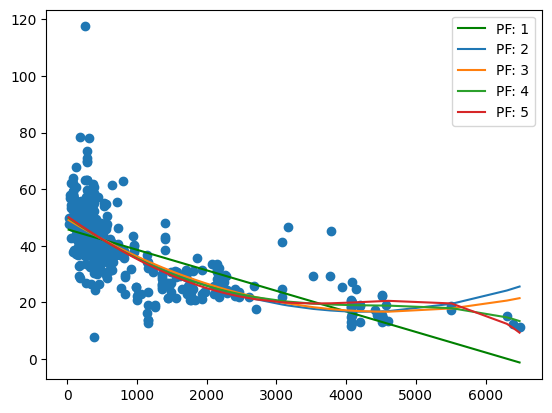

In [565]:
df2_sorted = df2.sort_values(by='X3 distance to the nearest MRT station')
sorted_X = df2_sorted['X3 distance to the nearest MRT station']
sorted_Y = df2_sorted['Y house price of unit area']

# Tworzenie wykresu
plt.scatter(sorted_X, sorted_Y)

epochs=1000
alpha = 0.1

poly = 1
beta0, betas, error = learn_and_fit(np.array(sorted_X), np.array(sorted_Y), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_X)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_X, results, label='PF: ' + str(poly), c='g')
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_Y),results)}')

poly = 2
beta0, betas, error = learn_and_fit(np.array(sorted_X), np.array(sorted_Y), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_X)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_X, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_Y),results)}')

poly = 3
beta0, betas, error = learn_and_fit(np.array(sorted_X), np.array(sorted_Y), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_X)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_X, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_Y),results)}')

poly = 4
beta0, betas, error = learn_and_fit(np.array(sorted_X), np.array(sorted_Y), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_X)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_X, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_Y),results)}')

poly = 5
beta0, betas, error = learn_and_fit(np.array(sorted_X), np.array(sorted_Y), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_X)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)
plt.plot(sorted_X, results, label='PF: ' + str(poly))
print(f'Dla stopnia wielomianu {poly} wynik R2 wynosi {metric.r2_score(np.array(sorted_Y),results)}')

plt.legend()
plt.show()


### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [566]:
#YOUR CODE HERE

epochs = 5000
poly = 4
beta0, betas, error = learn_and_fit(np.array(sorted_X), np.array(sorted_Y), epochs=epochs, alpha=alpha, polynomial_features=poly, normalize=True)
X = transform_to_polynomial_feature([[age] for age in np.array(sorted_X)], poly)
results = calculate_regression_function(X, np.append([beta0[-1]], betas[-1]), normalize=True)

metric.r2_score(np.array(sorted_Y),results)


0.5506949364629778